In [1]:
#Importing the required modules
import os
import pickle

import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

In [2]:
#Initialising mediapipe for collecting the hand landmarks
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [3]:
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

DATA_DIR = './data/'

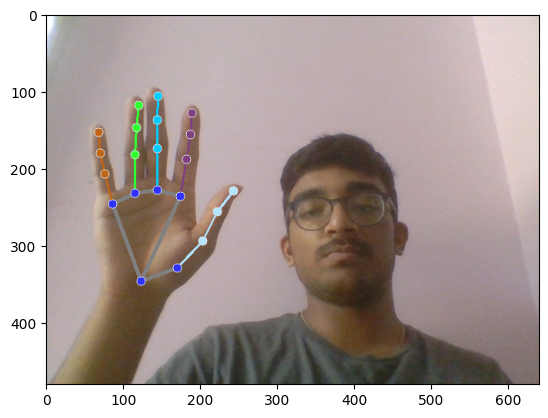

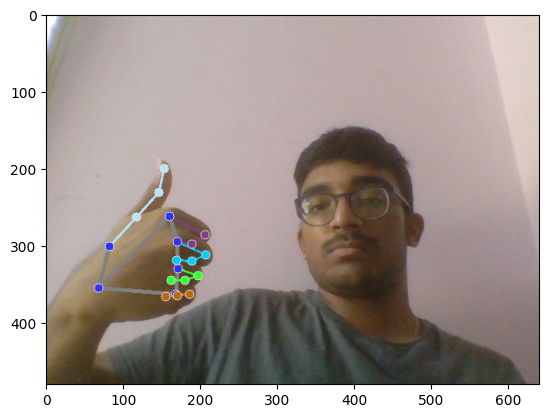

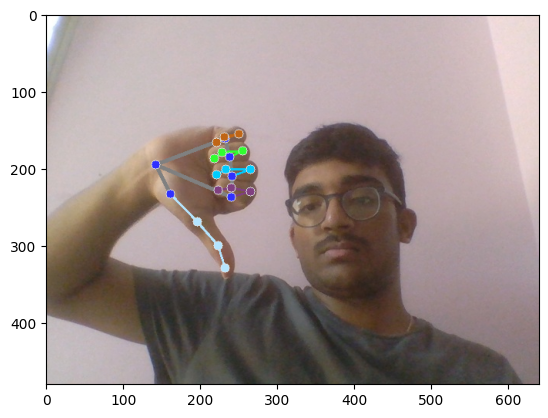

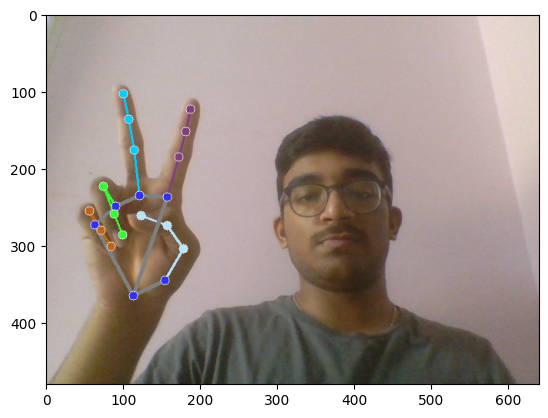

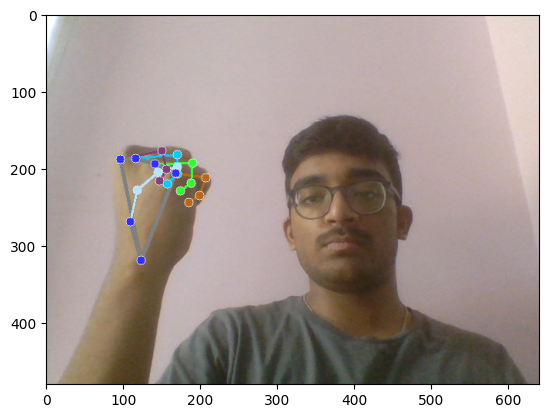

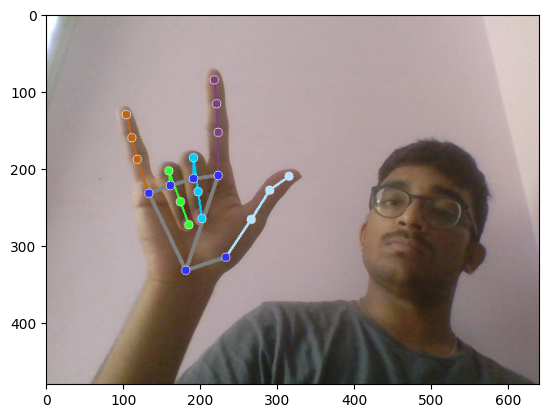

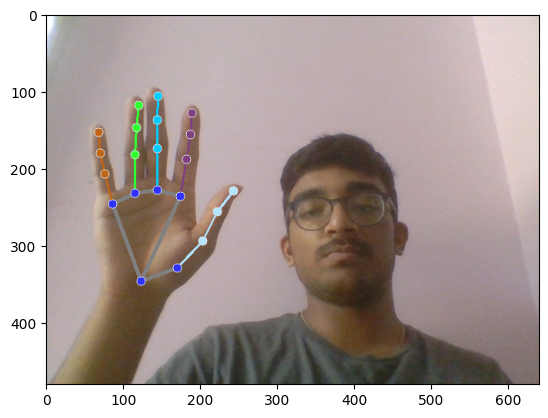

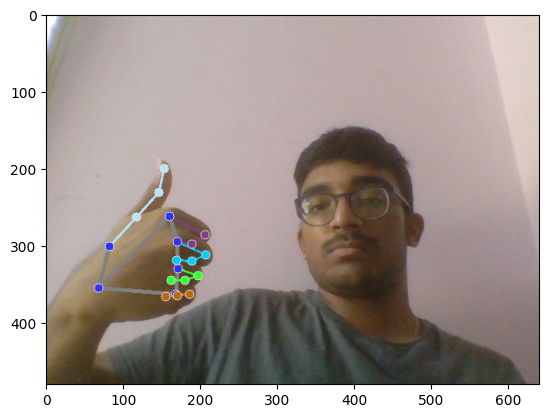

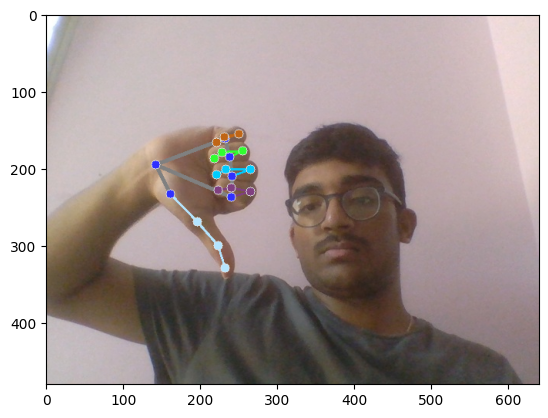

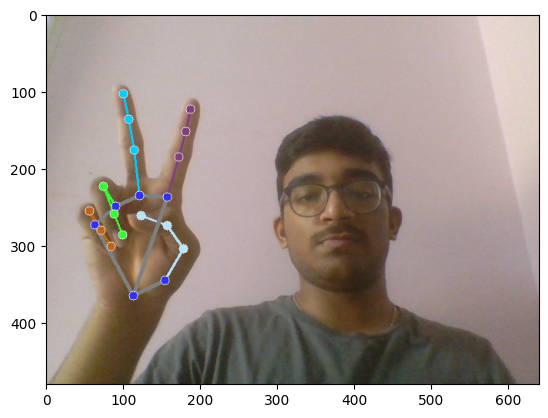

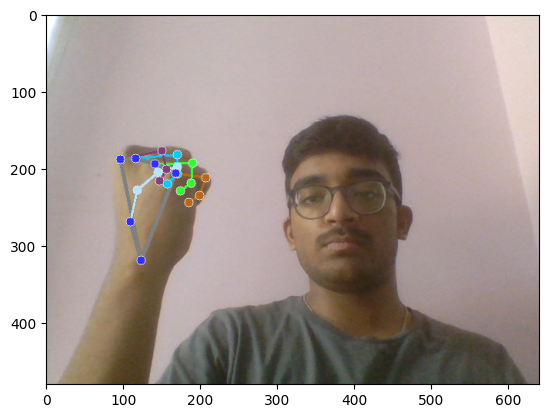

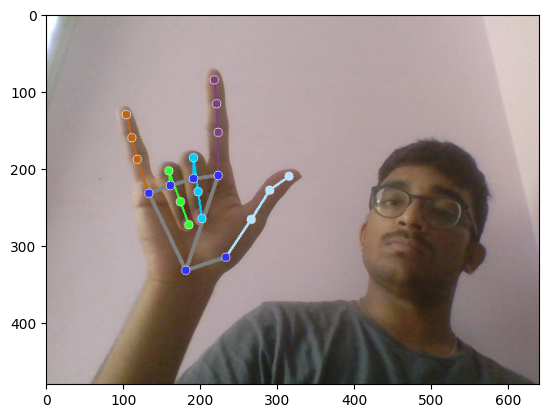

In [4]:
#Testing mediapipe:
for dir_ in os.listdir(DATA_DIR): 
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_))[:1]:
        img = cv2.imread(os.path.join(DATA_DIR,dir_,img_path))
        img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        
        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    img_rgb, #image to draw
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style())
            
        plt.figure()
        plt.imshow(img_rgb)
plt.show(0)

Storing the hand landmarks in the form or a numpy array to create the dataset

In [ ]:
data = []
labels = []
for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        data_aux = []

        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    data_aux.append(x)
                    data_aux.append(y)

            data.append(data_aux)
            labels.append(dir_)


In [6]:
f = open('data.pickle', 'wb')
pickle.dump({'data': data, 'labels': labels}, f)
f.close()